Hypothesis:

Under climate change, the wet areas get wetter, dry get dryer. This will shift carbon sinks through alkalinity dilution.
The wet areas tend to be where carbon is stored longer term (i.e. high lats where subduction occurs). Dry areas very stable, so increased carbon storage there iss just sit in the mixed layer. Shift from one to the other will comprimise ocean sink.

Quick test - how does concentrating the TALK and SAL in the dry areas by x% and diluting these in the wet areas by x% change the ewquilibrium DIC?

files

in downloads are time averaged surface fields from 196001-204912 from the PI control run, found here: $groupserv:/data/BatCaveNAS/ph290/cmip6/picontrol

dissic_Omon_UKESM1-0-LL_piControl_r1i1p1f2_gn_remap_tavg.nc

evspsbl_Amon_UKESM1-0-LL_piControl_r1i1p1f2_gn_remap_tavg.nc

pr_Amon_UKESM1-0-LL_piControl_r1i1p1f2_gn_remap_tavg.nc

sos_Omon_UKESM1-0-LL_piControl_r1i1p1f2_gn_remap_tavg.nc

talk_Omon_UKESM1-0-LL_piControl_r1i1p1f2_gn_remap_tavg.nc

tos_Omon_UKESM1-0-LL_piControl_r1i1p1f2_gn_remap_tavg.nc

spco2_Omon_UKESM1-0-LL_piControl_r1i1p1f2_gn_remap_tavg.nc



In [122]:
%load_ext autoreload
%autoreload 2

import iris
import numpy as np
from matplotlib import pyplot as plt
import iris.quickplot as qplt
from PyCO2SYS import CO2SYS
import PyCO2SYS as pyco2
#https://pyco2sys.readthedocs.io/en/latest/co2sys_nd/
# from PyCO2SYS.api import CO2SYS_wrap as co2sys
import iris.coord_categorisation
import matplotlib.gridspec as gridspec
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import iris.plot as iplt
from tqdm import tqdm

Pa_to_uatm = ((1.0/0.9869e-1))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [123]:
def extract_and_avg_yr_range(cube,start_year,end_year):
    try:
        iris.coord_categorisation.add_year(cube, 'time', name='year')
    except:
        pass
    loc = np.squeeze(np.where((cube.coord('year').points >= start_year) & (cube.coord('year').points <= end_year)))
    return cube[loc].collapsed('time',iris.analysis.MEAN)

def extract_range(cube,start_year,end_year):
    try:
        iris.coord_categorisation.add_year(cube, 'time', name='year')
    except:
        pass
    loc = np.squeeze(np.where((cube.coord('year').points >= start_year) & (cube.coord('year').points <= end_year)))
    return cube[loc]

def prepare_cmip_for_co2sys(cube):
    cube_data = cube.data.data
    cube_data[np.where(cube.data.mask)] = np.nan
    return cube_data


def area_avg(cube):
    try:
        cube.coord('latitude').guess_bounds()
    except:
        pass
    try:
        cube.coord('longitude').guess_bounds()
    except:
        pass
    grid_areas = iris.analysis.cartography.area_weights(cube)
    return cube.collapsed(['longitude', 'latitude'],iris.analysis.MEAN, weights=grid_areas)


def extract_region(cube,lon_west,lon_east,lat_south,lat_north):
    cube_region_tmp = cube.intersection(longitude=(lon_west, lon_east))
    return cube_region_tmp.intersection(latitude=(lat_south,lat_north))


def add_year_coord(cube):
    try:
        iris.coord_categorisation.add_year(cube, 'time', name='year')
    except:
        pass
    return cube

def sort_years(cube):
    my_sort = np.argsort(cube.coord('year').points)
    return cube[my_sort,:,:]

In [124]:
directory = '/Users/ph290/Downloads/'
# file1 = directory+'test_thetao_Omon_UKESM1-0-LL_historical_r1i1p1f2_gn_200001-201412.nc'
# file2 = directory+'test_so_Omon_UKESM1-0-LL_historical_r1i1p1f2_gn_200001-201412.nc'
# file3 = directory+'test_dissic_Omon_UKESM1-0-LL_historical_r1i1p1f2_gn_200001-201412.nc'
# file4 = directory+'test_talk_Omon_UKESM1-0-LL_historical_r1i1p1f2_gn_200001-201412.nc'
# file5 = directory+'test_spco2_Omon_UKESM1-0-LL_historical_r1i1p1f2_gn_195001-201412.nc'

model = 'UKESM1-0-LL'

file1 = directory+'tos_Omon_'+model+'_piControl_r1i1p1f2_gn_remap_tavg.nc'
file2 = directory+'sos_Omon_'+model+'_piControl_r1i1p1f2_gn_remap_tavg.nc'
file3 = directory+'dissic_Omon_'+model+'_piControl_r1i1p1f2_gn_remap_tavg.nc'
file4 = directory+'talk_Omon_'+model+'_piControl_r1i1p1f2_gn_remap_tavg.nc'
file5 = directory+'spco2_Omon_'+model+'_piControl_r1i1p1f2_gn_remap_tavg.nc'
file6 = directory+'pr_Amon_'+model+'_piControl_r1i1p1f2_gn_remap_tavg.nc'
file7 = directory+'evspsbl_Amon_'+model+'_piControl_r1i1p1f2_gn_remap_tavg.nc'

c_tos = iris.load_cube(file1)[0]
c_sos = iris.load_cube(file2)[0]
c_dissic = iris.load_cube(file3)[0][0]
c_talk = iris.load_cube(file4)[0][0]
c_spco2 = iris.load_cube(file5)[0]
c_pr = iris.load_cube(file6)[0]
c_evspsbl = iris.load_cube(file7)[0]
p_minus_e = c_pr - c_evspsbl

c_tos_data = c_thetao.data.data
c_sos_data = c_sos.data.data
c_dissic_data = c_dissic.data.data
c_talk_data = c_talk.data.data
c_spco2_data = c_spco2.data.data



/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/fileformats/cf.py:803: UserWarning: Missing CF-netCDF measure variable 'areacello', referenced by netCDF variable 'tos'
  warnings.warn(message % (variable_name, nc_var_name))
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/fileformats/cf.py:803: UserWarning: Missing CF-netCDF measure variable 'areacello', referenced by netCDF variable 'sos'
  warnings.warn(message % (variable_name, nc_var_name))
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/fileformats/cf.py:803: UserWarning: Missing CF-netCDF measure variable 'areacello', referenced by netCDF variable 'dissic'
  warnings.warn(message % (variable_name, nc_var_name))
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/fileformats/cf.py:803: UserWarning: Missing CF-netCDF measure variable 'volcello', referenced by netCDF variable 'dissic'
  warnings.warn(message % (variable_name, nc_var_name))
/Us

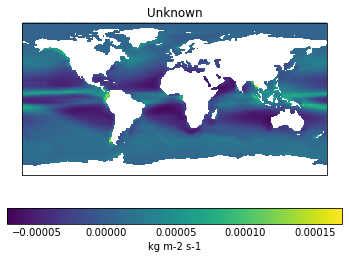

In [142]:
qplt.pcolormesh(p_minus_e)

In [164]:

# https://pyco2sys.readthedocs.io/en/latest/co2sys_nd/#arguments
par1type = 1  # The first parameter supplied is of type "1", which is "alkalinity"
par1 = c_talk_data * 1.0e3  # value of the first parameter
par2type = 4  # The first parameter supplied is of type "1", which is "DIC"
par2 = c_spco2_data * Pa_to_uatm
# ^ value of the second parameter, which is a long vector of different DIC's!
sal = c_sos_data# Salinity of the sample
tempin = c_tos_data+5.0  # Temperature at input conditions
presin = 0  # Pressure    at input conditions
tempout = 0  # Temperature at output conditions - doesn't matter in this example
presout = 0  # Pressure    at output conditions - doesn't matter in this example
sil = 0  # Concentration of silicate  in the sample (in umol/kg)
po4 = 0  # Concentration of phosphate in the sample (in umol/kg)
pHscale = 1  # pH scale at which the input pH is reported ("1" means "Total Scale")  - doesn't matter in this example
k1k2c = 4  # Choice of H2CO3 and HCO3- dissociation constants K1 and K2 ("4" means "Mehrbach refit")
kso4c = 1  # Choice of HSO4- dissociation constants KSO4 ("1" means "Dickson")

# Do the calculation. See CO2SYS's help for syntax and output format
CO2dict = CO2SYS(par1,par2,par1type,par2type,sal,tempin,tempout,presin,presout,sil,po4,pHscale,k1k2c,kso4c)

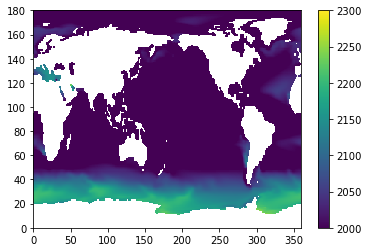

In [165]:
plt.pcolormesh(np.reshape(CO2dict['TCO2'],np.shape(c_talk_data)),vmin=2000,vmax=2300)
plt.colorbar()

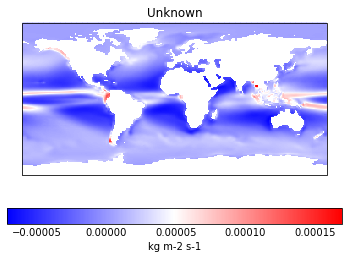

In [166]:
p_minus_e.data.mask = c_tos.data.mask
qplt.pcolormesh(p_minus_e,cmap='bwr')


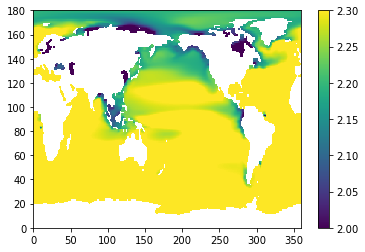

In [167]:
plt.pcolormesh(c_talk.data,vmin=2,vmax=2.3)
plt.colorbar()

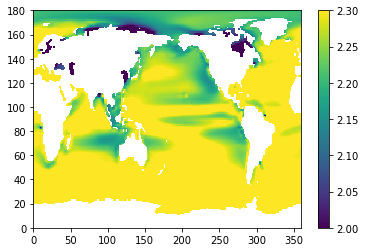

In [168]:
plt.pcolormesh(c_talk.data + (1000.0 * p_minus_e.data * c_talk.data),vmin=2,vmax=2.3)
plt.colorbar()

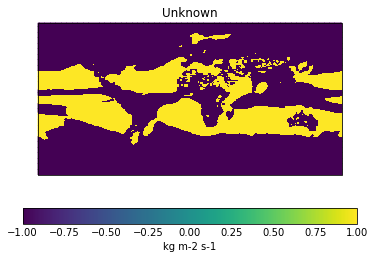

In [169]:
p_minus_e_pos_neg = p_minus_e.copy()
p_minus_e_pos_neg_data = p_minus_e_pos_neg.data
p_minus_e_pos_neg_data2 = p_minus_e_pos_neg_data.copy()
p_minus_e_pos_neg_data2[np.where(p_minus_e_pos_neg_data <= 0.0)] = 1.0
p_minus_e_pos_neg_data2[np.where(p_minus_e_pos_neg_data > 0.0)] = -1.0
p_minus_e_pos_neg.data = p_minus_e_pos_neg_data2
qplt.pcolormesh(p_minus_e_pos_neg)

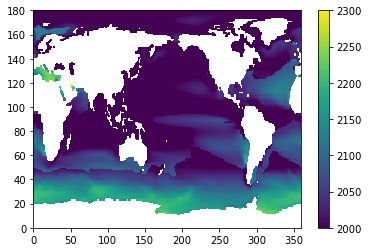

In [170]:

# c_talk.data.data + (0.1.0 * p_minus_e_pos_neg.data.data * c_talk.data.data)

# positive e-p area get 1% more positive, nevative get 1% more negative
c_sos_data2 = c_sos.data.data + (0.02 * p_minus_e_pos_neg.data.data * c_sos.data.data)
c_talk_data2 = c_talk.data.data + (0.02 * p_minus_e_pos_neg.data.data * c_talk.data.data)


par1type = 1  # The first parameter supplied is of type "1", which is "alkalinity"
par1 = c_talk_data2 * 1.0e3  # value of the first parameter
par2type = 4  # The first parameter supplied is of type "1", which is "DIC"
par2 = c_spco2_data * Pa_to_uatm
# ^ value of the second parameter, which is a long vector of different DIC's!
sal = c_sos_data2 # Salinity of the sample
tempin = c_tos_data  # Temperature at input conditions
presin = 0  # Pressure    at input conditions
tempout = 0  # Temperature at output conditions - doesn't matter in this example
presout = 0  # Pressure    at output conditions - doesn't matter in this example
sil = 0  # Concentration of silicate  in the sample (in umol/kg)
po4 = 0  # Concentration of phosphate in the sample (in umol/kg)
pHscale = 1  # pH scale at which the input pH is reported ("1" means "Total Scale")  - doesn't matter in this example
k1k2c = 4  # Choice of H2CO3 and HCO3- dissociation constants K1 and K2 ("4" means "Mehrbach refit")
kso4c = 1  # Choice of HSO4- dissociation constants KSO4 ("1" means "Dickson")

CO2dict2 = CO2SYS(par1,par2,par1type,par2type,sal,tempin,tempout,presin,presout,sil,po4,pHscale,k1k2c,kso4c)
plt.pcolormesh(np.reshape(CO2dict2['TCO2'],np.shape(c_talk_data)),vmin=2000,vmax=2300)
plt.colorbar()

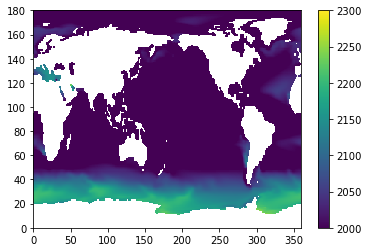

In [171]:
plt.pcolormesh(np.reshape(CO2dict['TCO2'],np.shape(c_talk_data)),vmin=2000,vmax=2300)
plt.colorbar()

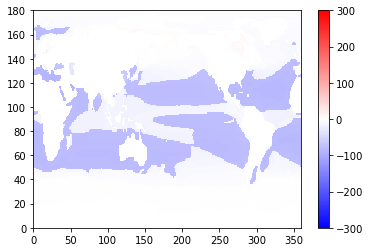

In [172]:
plt.pcolormesh(np.reshape(CO2dict['TCO2'],np.shape(c_talk_data)) - np.reshape(CO2dict2['TCO2'],np.shape(c_talk_data)),vmin=-300,vmax=300,cmap='bwr')
plt.colorbar()

In [136]:
c_tmp = c_tos.copy()
c_tmp.data = np.reshape(CO2dict['TCO2'],np.shape(c_talk_data)) - np.reshape(CO2dict2['TCO2'],np.shape(c_talk_data))

In [137]:
area_avg(np.ma.masked_array(c_tmp).data.mask = c_tos.data.mask)

SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (<ipython-input-137-00b27dc845fc>, line 1)

In [138]:
c_tmp.data = np.ma.masked_array(np.reshape(CO2dict['TCO2'],np.shape(c_talk_data)) - np.reshape(CO2dict2['TCO2'],np.shape(c_talk_data))).mask = c_tos.data.mask

In [139]:
area_avg(c_tmp).data

/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


array(0.31369695)

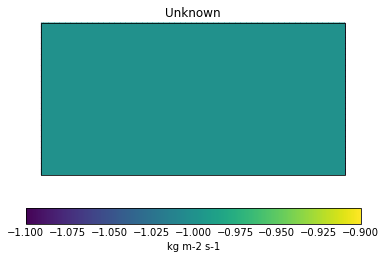

In [140]:

qplt.pcolormesh(p_minus_e_pos_neg)

In [141]:
p_minus_e.data

masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        ...,
        [5.619670901069185e-06, 5.637371032207739e-06,
         5.65228447158006e-06, ..., 5.563979357248172e-06,
         5.582680387306027e-06, 5.60171383767738e-06],
        [5.341290943761123e-06, 5.347600108507322e-06,
         5.352871539798798e-06, ..., 5.314694135449827e-06,
         5.324374797055498e-06, 5.334667548595462e-06],
        [5.065437107987236e-06, 5.068428436061367e-06,
         5.0684639063547365e-06, ..., 5.059265276941005e-06,
         5.062362106400542e-06, 5.062413492851192e-06]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, Fal